# Python Foundations Project: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset overview

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### Question 1: Write the code to check the shape of the dataset and write your observations based on that

In [3]:
df.shape

(1898, 9)

#### Observations: 
- The FoodHub dataframe has 1898 rows and 9 columns

### Question 2: Write the observations based on the below output from the info() method.

In [4]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
- All 1898 observations have no missing (i.e., non-null) values across all columns
- All of the dtypes (int64, object, and float64) are appropriate for their respective variables

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same.

In [5]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df["restaurant_name"]=df["restaurant_name"].astype("category")
df["cuisine_type"]=df["cuisine_type"].astype("category")
df["day_of_the_week"]=df["day_of_the_week"].astype("category")
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 103.7+ KB


#### Observations:
- After converting the three variables from object to category, the memory usage is now almost 30KB lower (133.6+ KB to 103.7+ KB)

### Question 4: Write the code to find the summary statistics and write your observations based on that.

In [6]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
- Order ID and Customer ID are just identifiers for each order
- The cost of an order ranges from 4.47 to 35.41 dollars, with a average order costing ~16.49 dollars
- Food preperation times range from 20 to 35 minutes, with an average of ~27.4 minutes and a standard deviation of 4.6 minutes
- Delivery times range from 15 to 33 minutes, with an average of ~24.2 minutes and a standard deviation of 5.0 minutes

### Question 5: How many orders are not rated?

In [7]:
#measure the length of the subset of the dataframe in which the rating is 'Not given'
not_rated = df[df.rating=='Not given']
len(not_rated)

736

#### Observations:
- 736 of the 1836 orders do not have a rating

## *Exploratory Data Analysis (EDA)*

### Univariate Analysis

### Question 6: Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset.

In [8]:
#returns the number of unique values associated with each variable
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

In [9]:
"""groups the data by customer ID and sum the costs of all orders associated with that customer,
then sort these sums from highest to lowest, showing only the five highest totals"""
df_customer=df.groupby('customer_id')['cost_of_the_order'].sum().sort_values(ascending=False).reset_index()
print(df_customer.head(5))

   customer_id  cost_of_the_order
0        52832             225.80
1       250494             183.83
2        47440             158.18
3       276192             146.46
4        83287             139.31


In [10]:
#return the percent of total cost of all orders placed by the the top quarter of customers
df_customer.head(300).cost_of_the_order.sum() / df_customer.cost_of_the_order.sum()

0.5067281242555441

In [11]:
#returns the total cost of all orders ordered on FoodHub within the period
df.cost_of_the_order.sum()

31314.82

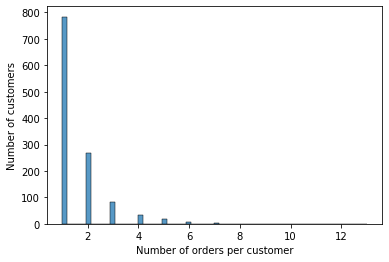

In [12]:
#plots histogram plotting the number of orders, from lowest to highest, for each customer ID
ax = sns.histplot(df.customer_id.value_counts())
ax.set(xlabel="Number of orders per customer")
ax.set(ylabel='Number of customers')
plt.show()

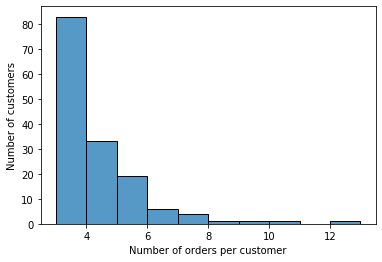

In [13]:
#same histogram as above but with more granularity for those customers which order 3 or more times
ax=sns.histplot(df.customer_id.value_counts(), binwidth=1, binrange=(3,13))
ax.set(xlabel="Number of orders per customer")
ax.set(ylabel='Number of customers')
plt.show()

In [14]:
#returns the number of customers which ordered two or fewer times in the period
(df.groupby('customer_id')['order_id'].count().sort_values(ascending=False)<=2).sum()

1051

In [15]:
#returns the percent of all customers who ordered two or fewer times
round(1051/1200*100,1)

87.6

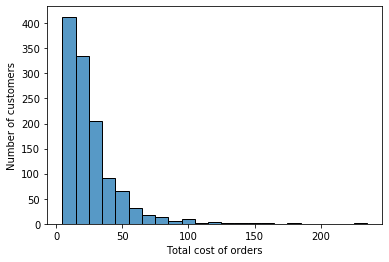

In [16]:
ax = sns.histplot(df_customer.cost_of_the_order, binwidth=10)
ax.set(xlabel="Total cost of orders")
ax.set(ylabel='Number of customers')
plt.show()

In [17]:
#returns the number of customers which ordered three or more times in the period
(df.groupby('customer_id')['order_id'].count().sort_values(ascending=False)>=3).sum()

149

In [18]:
"""groups the data by restaurant and sum the costs of all orders associated with that customer,
then sort these sums from highest to lowest, showing only the five highest totals"""
df_restaurant=df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).reset_index()
print(df_restaurant.head(5))

             restaurant_name  cost_of_the_order
0                Shake Shack            3579.53
1          The Meatball Shop            2145.21
2          Blue Ribbon Sushi            1903.95
3  Blue Ribbon Fried Chicken            1662.29
4                       Parm            1112.76


In [19]:
#returns the total cost of all orders fulfilled by the top-12 restaurants
df_restaurant.head(12).cost_of_the_order.sum() / df_restaurant.cost_of_the_order.sum()

0.506080188230365

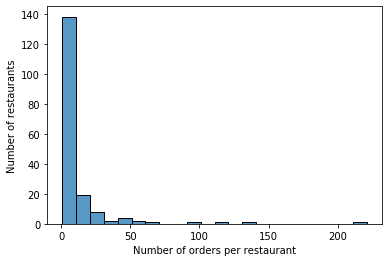

In [20]:
#plots histogram plotting the number of orders, from lowest to highest, for each restaurant
ax = sns.histplot(df.restaurant_name.value_counts(),binwidth=10)
ax.set(ylabel="Number of restaurants")
ax.set(xlabel='Number of orders per restaurant')
plt.show()

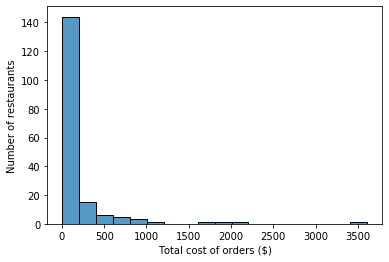

In [21]:
#plots histogram plotting the total cost of orders, from lowest to highest, for each restaurant
ax = sns.histplot(df_restaurant.cost_of_the_order,binwidth=200)
ax.set(ylabel="Number of restaurants")
ax.set(xlabel='Total cost of orders ($)')
plt.show()

In [22]:
#returns a list of cuisine types in the dataset
list(df.cuisine_type.unique())

['Korean',
 'Japanese',
 'Mexican',
 'American',
 'Indian',
 'Italian',
 'Mediterranean',
 'Chinese',
 'Middle Eastern',
 'Thai',
 'Southern',
 'French',
 'Spanish',
 'Vietnamese']

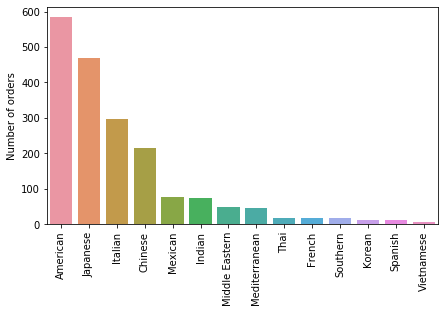

In [23]:
#plots histogram of the number of orders, from highest to lowest, for each cuisine type
plt.figure(figsize=(7,4))
ax=sns.countplot(data=df, x='cuisine_type', order= df['cuisine_type'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='')
ax.set(ylabel='Number of orders')
plt.show()

In [24]:
#returns the total number of orders associated with the top-three cuisine types
(df[df.cuisine_type=='American']['order_id']).count()+(df[df.cuisine_type=='Italian']['order_id']).count()+(df[df.cuisine_type=='Japanese']['order_id']).count()

1352

In [25]:
#returns the total number of orders associated with the top-four cuisine types
(df[df.cuisine_type=='American']['order_id']).count()+(df[df.cuisine_type=='Italian']['order_id']).count()+(df[df.cuisine_type=='Japanese']['order_id']).count()+(df[df.cuisine_type=='Chinese']['order_id']).count()

1567

In [26]:
#returns the percent of all orders from the top-three cuisine types
round(1352/1898,2)

0.71

In [27]:
#returns the percent of all orders from the top-four cuisine types
round(1567/1898,2)

0.83

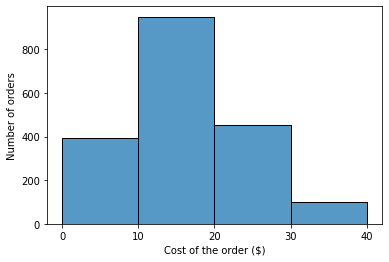

In [28]:
#plots histogram of the costs of all orders within the dataset
ax=sns.histplot(data=df, x='cost_of_the_order', binwidth=10, binrange=(0,40))
ax.set(xlabel='Cost of the order ($)')
ax.set(ylabel='Number of orders')
ax.set(xticks=[0,10,20,30,40])
plt.show()

In [29]:
#returns the number of orders that cost less than 10 dollars or more than 20 dollars
df[df.cost_of_the_order<10]['order_id'].count() + df[df.cost_of_the_order>20]['order_id'].count()

949

In [30]:
#returns the percent of all orders that do not fall within the 10 to 20 dollar range
949/df.order_id.count()

0.5

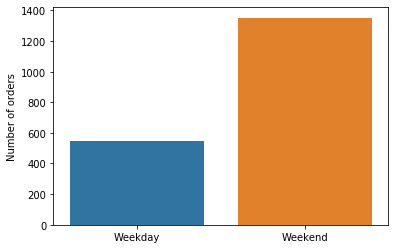

In [31]:
#returns countplot of orders by day of the week the order was placed (i.e. weekday or weekend)
ax=sns.countplot(data=df,x='day_of_the_week')
ax.set(xlabel='')
ax.set(ylabel='Number of orders')
plt.show()

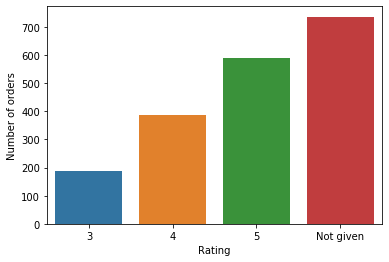

In [32]:
#returns countplot of orders by rating from lowest to highest number
df1=df.sort_values('rating')
ax=sns.countplot(data=df1, x='rating')
ax.set(xlabel='Rating')
ax.set(ylabel='Number of orders')
plt.show()

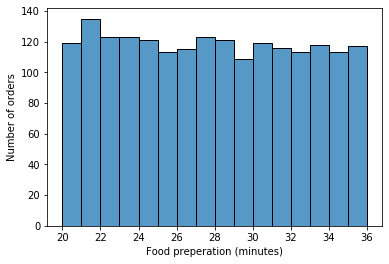

In [33]:
#returns histogram of food preperation times
ax=sns.histplot(data=df, x='food_preparation_time',binwidth=1, binrange=(20,36))
ax.set(xlabel='Food preperation (minutes)')
ax.set(ylabel='Number of orders')
plt.show()

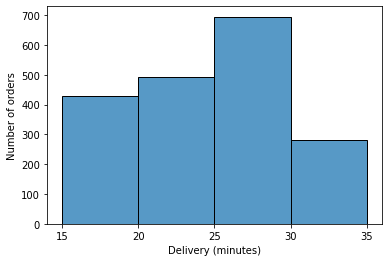

In [34]:
#returns histogram of delivery times
arr=np.array(range(15,35,5))
ax=sns.histplot(data=df, x='delivery_time',bins=arr, binwidth=5)
ax.set(xlabel='Delivery (minutes)')
ax.set(ylabel='Number of orders')
ax.set(xticks=[15,20,25,30,35])
plt.show()

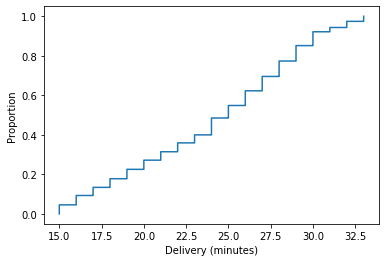

In [35]:
#returns ECDF of delivery times
ax=sns.ecdfplot(data=df, x="delivery_time")
ax.set(xlabel='Delivery (minutes)')
plt.show()

In [36]:
#returns percent of all orders with delivery times greater than 24 minutes
(df[df.delivery_time>24].groupby('delivery_time')['delivery_time'].count()).sum() / 1898

0.5147523709167545

In [37]:
#returns names of all variables associated with each order
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

#### Observations:
- The top quarter of customers by cost of orders placed provide more than half of the total cost of all orders
- 87.6% of customers have two or fewer orders
- The top 12 resturants by cost of orders fulfilled provide more than half of the total cost of all orders
- The top-three most popular cuisines in order are American, Japanese, and Italian, which comprise 71% of all orders
- Half of all orders are in the 10 to 20 dollar range
- More than twice the number of weekday orders are placed during the weekend days
- Food preparation times are close to uniformly distributed across the range of times (20-35 minutes)
- The average delivery time is 24 minutes but delivery times are predominately between 20 and 30 minutes

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders.

In [38]:
#returns counts of all orders associated with the top-five most ordered restaurant
df.restaurant_name.value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [39]:
#returns the same as above, but as a dataframe
df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending = False).reset_index().head()

,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:
- The top-five restaurants by number of orders are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm

### Question 8: Write the code to find the most popular cuisine on weekends.

In [40]:
#subsets dataframe for weekend orders, then returns the number of orders from the top-three cuisine types
df2=df[df.day_of_the_week=='Weekend']
df2.cuisine_type.value_counts().head(3)

American    415
Japanese    335
Italian     207
Name: cuisine_type, dtype: int64

#### Observations:
- The top-three cuisine types for weekend orders are: American, Japanese, and Italian

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset? 

In [41]:
#returns the percent of all orders which cost more than 20 dollars
round(len(df[df.cost_of_the_order>20])/len(df)*100,1)

29.2

#### Observations:
- 29.2% of all orders cost above 20 dollars

### Question 10: Write the code to find the mean delivery time based on this dataset.

In [42]:
#returns the mean of all delivery times
round(df.delivery_time.mean(),1)

24.2

#### Observations:
- The average delivery time of all orders is 24.2 minutes

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details.

In [43]:
#returns all data associated with the order that has the highest cost
df.sort_values('cost_of_the_order',ascending=False).head(1)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


#### Observations:
- The ID for the customer that ordered the highest cost meal is 62359

## Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset.

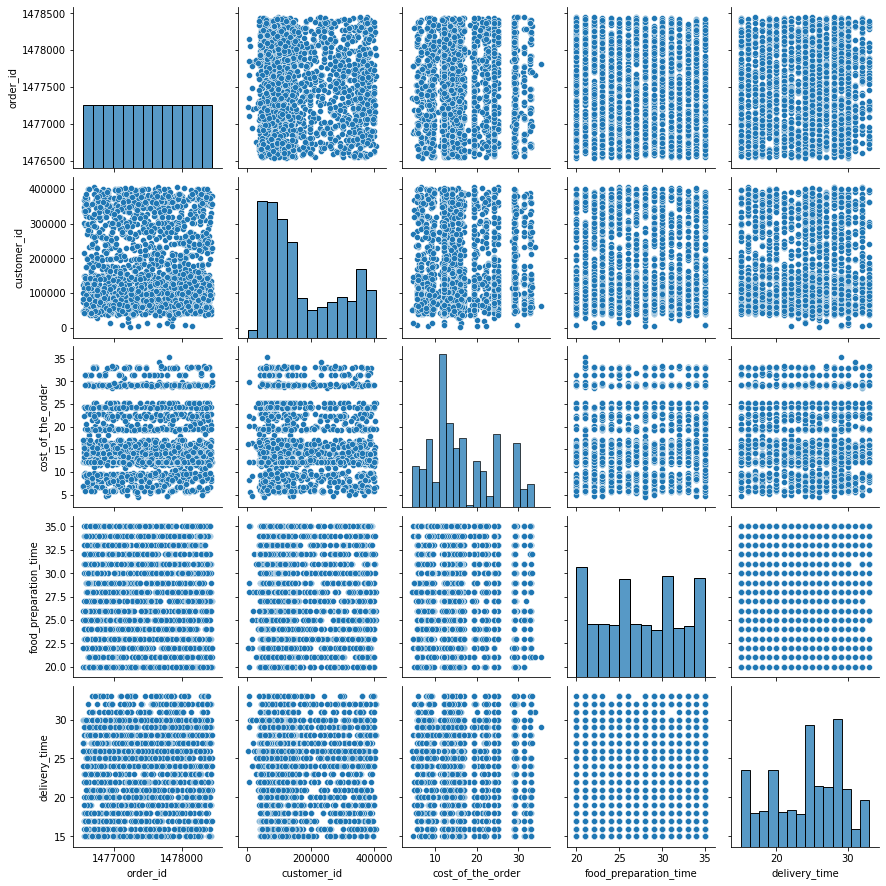

In [44]:
#returns pairplot of the dataset
sns.pairplot(data=df)
plt.show()

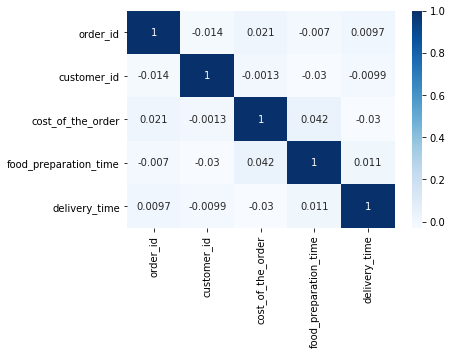

In [45]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

#### Observations
- A multivariate analysis of the dataset shows no significant correlations between any of the available variables

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer.

In [46]:
#returns a new dataset in which all "Not given" ratings are replaced with zeroes
df3=df.copy()
df3.rating.replace("Not given",0,inplace=True)#

In [47]:
#converts the ratings to numbers
df3.rating=pd.to_numeric(df3.rating)

In [48]:
#replaces all zero ratings as naans
df3.rating.replace(0,np.nan,inplace=True)

In [49]:
#returns the numbers of orders with non-naan ratings
df3.rating.count()

1162

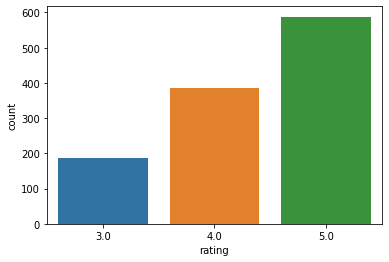

In [50]:
#plots countplot of all non-naan ratings
sns.countplot(data=df3,x='rating')
plt.show()

In [51]:
#returns subset of restaurants with mean rating greater than or equal to 4
df4=df3.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).reset_index()
print(df4[df4.rating>=4])

                 restaurant_name  rating
0           Lantern Thai Kitchen     5.0
1                El Parador Cafe     5.0
2    Grand Sichuan International     5.0
3             Haru Gramercy Park     5.0
4                    Hot Kitchen     5.0
..                           ...     ...
134  Dirty Bird To Go (archived)     4.0
135          Hampton Chutney Co.     4.0
136               The MasalaWala     4.0
137                   Mira Sushi     4.0
138                    Hatsuhana     4.0

[139 rows x 2 columns]


In [52]:
#returns the top-five restaurants by total number of orders with ratings
df3.groupby('restaurant_name')['rating'].count().sort_values(ascending=False).reset_index().head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [53]:
#returns the mean rating of all orders placed at Shake Shack
df3[df3['restaurant_name']=='Shake Shack'].rating.mean()

4.2781954887218046

In [54]:
#returns the mean rating of all orders placed at The Meatball Shop
df3[df3['restaurant_name']=='The Meatball Shop'].rating.mean()

4.511904761904762

In [55]:
#returns the mean rating of all orders placed at Blue Ribbon Sushi
df3[df3['restaurant_name']=='Blue Ribbon Sushi'].rating.mean()

4.219178082191781

In [56]:
#returns the mean rating of all orders placed at Blue Ribbon Fried Chicken
df3[df3['restaurant_name']=='Blue Ribbon Fried Chicken'].rating.mean()

4.328125

#### Observations:
- 139 restaurants have a mean rating for all orders of greater than or equal to 4
- Only 4 restaurants have 50 or more orders with ratings
- The following restaurants qualify for this promotional offer: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset.

In [57]:
df5 = df[df.cost_of_the_order>20]
amount1 = df5.cost_of_the_order.sum()*.25

In [58]:
df6=df[df.cost_of_the_order<=20]
amount2=df6[df6.cost_of_the_order>5].cost_of_the_order.sum()*.15

In [59]:
net_revenue = amount1 + amount2
print(round(net_revenue,2))

6166.3


#### Observations:
- The company could generate an additional 6166.30 dollars by charging restaurants

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time.

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [60]:
df['total_time']=df['food_preparation_time']+df['delivery_time']
round(len(df[df.total_time>60])/len(df)*100,1)

10.5

#### Observations:
- Approximately 10.5 percent of customers' orders take over 60 minutes in total delivery time

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results.

In [61]:
#creates a new dataset which includes only orders placed on the weekend
df7=df[df.day_of_the_week=='Weekend']

In [62]:
#creates a new dataset which includes only orders placed on weekdays
df8=df[df.day_of_the_week=='Weekday']

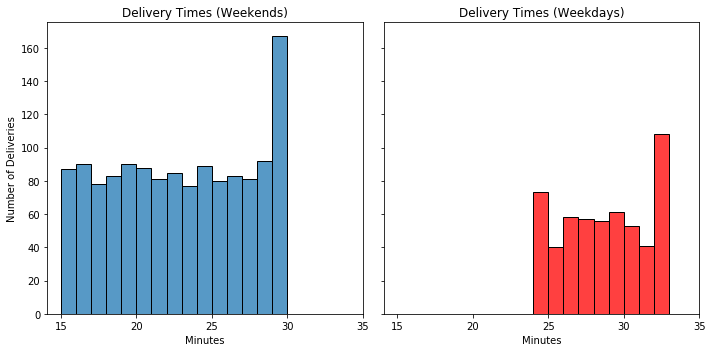

In [63]:
#plots two histogram, one each for delivery times during weekdays and weekends
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)
sns.histplot(data=df7, x='delivery_time', ax=axes[0], binwidth=1, label='Weekend')
sns.histplot(data=df8, x='delivery_time', ax=axes[1], binwidth=1, label='Weekday', color='r')
axes[0].set(xlabel='Minutes')
axes[0].set(ylabel='Number of Deliveries')
axes[0].set(title='Delivery Times (Weekends)')
axes[0].set(xticks=[15,20,25,30,35])
axes[1].set(xlabel='Minutes')
axes[1].set(title='Delivery Times (Weekdays)')
axes[1].set(xticks=[15,20,25,30,35])
plt.tight_layout()
plt.show()

In [64]:
#returns the mean delivery time of weekend orders
weekend_dtime=round(df7.delivery_time.mean(),2)
print(weekend_dtime)

22.47


In [65]:
#returns the mean delivery time of weekday orders
weekday_dtime=round(df8.delivery_time.mean(),2)
print(weekday_dtime)

28.34


In [66]:
#returns the difference between average weekeday delivery times and average weekend delivery times
round(weekday_dtime-weekend_dtime,2)

5.87

In [67]:
#returns the percent difference between the average weekend delivery time from the weekday average
round(5.87/22.47*100,2)

26.12

In [68]:
#returns summary statistics for weekend orders
df7.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,total_time
count,1.351000e+03,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000
mean,1.477500e+06,170422.561066,16.574833,27.436714,22.470022,49.906736
std,5.541681e+02,113403.749068,7.486979,4.601476,4.628938,6.624883
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,35.000000
25%,1.477016e+06,77665.000000,12.080000,23.000000,18.500000,45.000000
50%,1.477505e+06,127934.000000,14.410000,27.000000,22.000000,50.000000
75%,1.477980e+06,268958.000000,22.285000,31.000000,27.000000,55.000000
max,1.478444e+06,405334.000000,33.370000,35.000000,30.000000,65.000000


In [69]:
#returns summary statistics for weekday orders
df8.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,total_time
count,5.470000e+02,547.000000,547.000000,547.000000,547.000000,547.000000
mean,1.477483e+06,173010.771481,16.311188,27.212066,28.340037,55.552102
std,5.329454e+02,114505.333032,7.479521,4.708616,2.891428,5.567972
min,1.476559e+06,5693.000000,4.750000,20.000000,24.000000,44.000000
25%,1.477043e+06,78913.000000,12.080000,23.000000,26.000000,51.000000
50%,1.477457e+06,130521.000000,14.070000,27.000000,28.000000,55.000000
75%,1.477929e+06,276192.000000,22.285000,31.000000,31.000000,59.500000
max,1.478435e+06,404649.000000,35.410000,35.000000,33.000000,68.000000


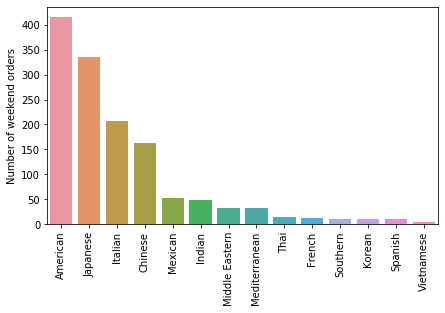

In [70]:
#plots histogram of the number of weekend orders, from highest to lowest, for each cuisine type
plt.figure(figsize=(7,4))
ax=sns.countplot(data=df7, x='cuisine_type', order= df['cuisine_type'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='')
ax.set(ylabel='Number of weekend orders')
plt.show()

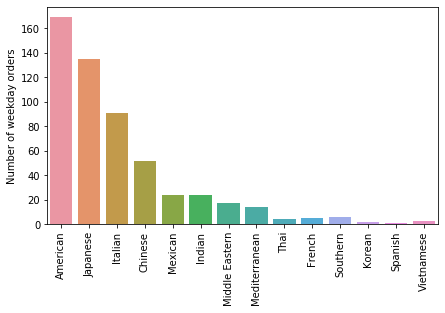

In [71]:
#plots histogram of the number of weekday orders, from highest to lowest, for each cuisine type
plt.figure(figsize=(7,4))
ax=sns.countplot(data=df8, x='cuisine_type', order= df['cuisine_type'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='')
ax.set(ylabel='Number of weekday orders')
plt.show()

In [72]:
#returns counts of all orders associated with the top-ten most ordered restaurant on weekends
df7.restaurant_name.value_counts().head(10)

Shake Shack                  145
The Meatball Shop             95
Blue Ribbon Sushi             85
Blue Ribbon Fried Chicken     74
RedFarm Broadway              44
RedFarm Hudson                44
Parm                          42
TAO                           37
Han Dynasty                   36
Nobu Next Door                29
Name: restaurant_name, dtype: int64

In [73]:
#returns counts of all orders associated with the top-ten most ordered restaurant on weekdays
df8.restaurant_name.value_counts().head(10)

Shake Shack                      74
The Meatball Shop                37
Blue Ribbon Sushi                34
Parm                             26
Blue Ribbon Fried Chicken        22
RedFarm Broadway                 15
Blue Ribbon Sushi Bar & Grill    15
Sushi of Gari 46                 13
Nobu Next Door                   13
TAO                              12
Name: restaurant_name, dtype: int64

In [74]:
#returns the mean rating, from highest to lowest, of weekend orders from each cuisine type
df7.groupby('cuisine_type')['delivery_time'].mean().sort_values(ascending=False)

cuisine_type
Vietnamese        25.000000
French            24.615385
Spanish           23.000000
Italian           22.705314
Mexican           22.641509
American          22.542169
Japanese          22.519403
Indian            22.346939
Chinese           22.269939
Thai              22.266667
Middle Eastern    21.750000
Mediterranean     21.312500
Southern          20.727273
Korean            20.000000
Name: delivery_time, dtype: float64

In [75]:
#returns the mean rating, from highest to lowest, of weekday orders from each cuisine type
df8.groupby('cuisine_type')['delivery_time'].mean().sort_values(ascending=False)

cuisine_type
Southern          29.500000
Chinese           28.826923
Italian           28.802198
Mediterranean     28.785714
Middle Eastern    28.470588
Mexican           28.250000
American          28.248521
Japanese          28.133333
Spanish           28.000000
Vietnamese        27.666667
Indian            27.625000
French            27.200000
Thai              26.500000
Korean            26.000000
Name: delivery_time, dtype: float64

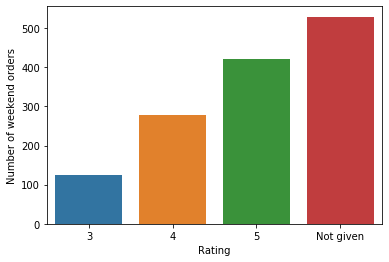

In [76]:
#plots countplot of weekend orders by rating
ax=sns.countplot(data=df7.sort_values('rating'), x='rating')
ax.set(xlabel='Rating')
ax.set(ylabel='Number of weekend orders')
plt.show()

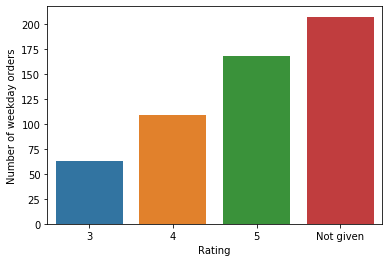

In [77]:
#plots countplot of weekday orders by rating
ax=sns.countplot(data=df8.sort_values('rating'), x='rating')
ax.set(xlabel='Rating')
ax.set(ylabel='Number of weekday orders')
plt.show()

In [78]:
#returns average cost of weekend orders by rating
df7.groupby('rating')['cost_of_the_order'].mean()

rating
3            16.197120
4            16.994585
5            17.229310
Not given    15.924669
Name: cost_of_the_order, dtype: float64

In [79]:
#returns average cost of weekday orders by rating
df8.groupby('rating')['cost_of_the_order'].mean()

rating
3            16.275397
4            15.987982
5            16.306667
Not given    16.495942
Name: cost_of_the_order, dtype: float64

In [80]:
#returns percent of weekend orders associated with each rating
df7.groupby('rating')['order_id'].count() / df7.order_id.count()

rating
3            0.092524
4            0.205033
5            0.310881
Not given    0.391562
Name: order_id, dtype: float64

In [81]:
#returns percent of weekday orders associated with each rating
df8.groupby('rating')['order_id'].count() / df8.order_id.count()

rating
3            0.115174
4            0.199269
5            0.307130
Not given    0.378428
Name: order_id, dtype: float64

#### Observations:
- Deliveries during weekdays take, on average, almost 6 minutes longer than during weekends
- The above distributions of delivery times during weekends versus those on weekdays show the extent of this difference

## Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis.

#### Insights:
- The number of drivers available to deliver orders appear to be overwhelmed by higher weekend volumes, causing delivery times to increase by 26%
- However, the proportions of lower rated (3 or 4 star) weekend orders are actually not significantly different than weekday orders
- Therefore, the additional benefits to customers from lowering delivery times during the weekend may not be worth the costs of additional driver incentives